In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# 2. Load Dataset
df = pd.read_csv(r"C:\Users\kunda\OneDrive\Desktop\green_Ai_Project\pollution_2000_2023.csv", low_memory=False)
# 3. Data Preprocessing
df = df.drop(columns=["Unnamed: 0", "Address"], errors="ignore")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df = df.sort_values("date")

In [7]:
# Focus on one city for simplicity
city_df = df[df["city"] == "Los Angeles"].copy()

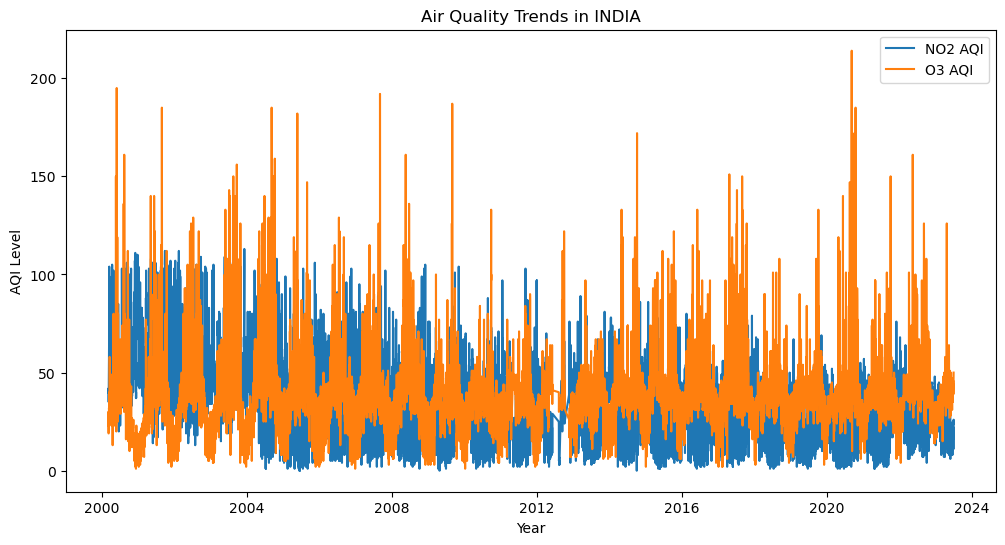

In [14]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
plt.plot(city_df["date"], city_df["no2_aqi"], label="NO2 AQI")
plt.plot(city_df["date"], city_df["o3_aqi"], label="O3 AQI")
plt.legend()
plt.title("Air Quality Trends in Los Angeles")
plt.xlabel("Year")
plt.ylabel("AQI Level")
plt.show()

In [9]:
# 5. Feature Engineering
# Predict NO2 AQI (example target)
city_df["no2_aqi_lag1"] = city_df["no2_aqi"].shift(1)
city_df["no2_aqi_ma3"] = city_df["no2_aqi"].rolling(window=3).mean()
city_df = city_df.dropna()

features = ["no2_aqi_lag1", "no2_aqi_ma3", "o3_mean", "so2_mean", "co_mean"]
target = "no2_aqi"

X = city_df[features]
y = city_df[target]

In [10]:
# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
# 7. Train ML Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# 8. Model Evaluation
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 3.605770625928027
R² Score: 0.8991511485115696


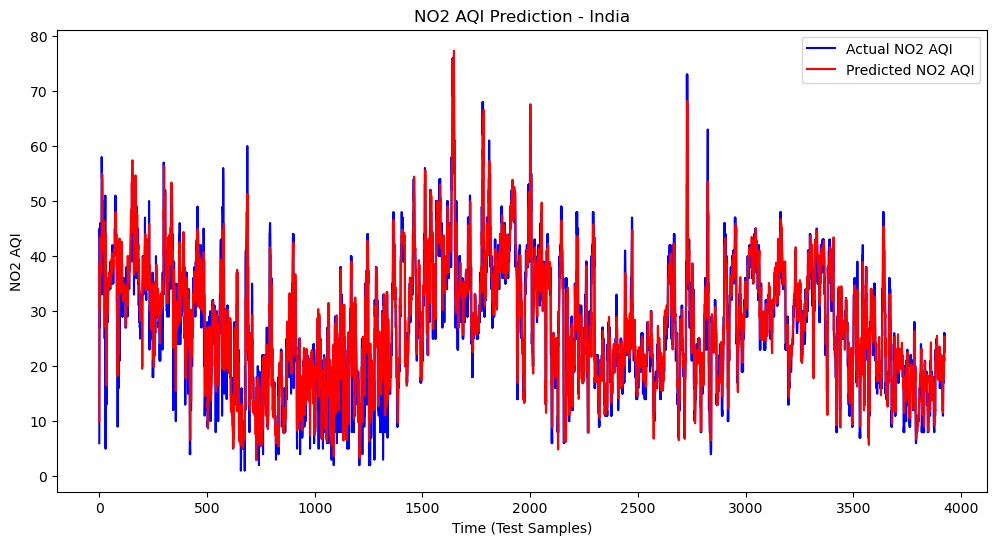

In [16]:
# 9. Visualization of Predictions
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual NO2 AQI", color="blue")
plt.plot(y_pred, label="Predicted NO2 AQI", color="red")
plt.legend()
plt.title("NO2 AQI Prediction - Los Angeles")
plt.xlabel("Time (Test Samples)")
plt.ylabel("NO2 AQI")
plt.show()